In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [276]:
# Importar o ficheiro
df = pd.read_csv('C:\\Users\\guilh\\Desktop\\AASE\\Projeto\\csv\\train.csv', sep=";", header=0)

In [277]:
                        #BRAND
#Como é possível verificar no gráfico de barras, a maior queda de valores é entre chevrolet para porshe. Portanto, vamos considerar os valores "Ford", "BMW", "Mercedes" e "Chevorlet", os outros valores vão ser populados com "Outro"
allowed_brands = ['Ford', 'Mercedes-Benz', 'BMW', 'Chevrolet']
df['brand'] = df['brand'].apply(lambda x: x if x in allowed_brands else 'Other')

In [278]:
                        #MODEL
#Como vimos na matriz da correlação, a marca não interfere no preço do automóvel, pelo que pode ser removida.
#drop the model column
df.drop('model', axis = 1, inplace = True)

In [279]:
                        #MODEL_YEAR
#Dividimos as datas tipo-  2000-2005 | 2005-2010 ... ?????
                 

In [280]:
                        #MILAGE
#Alterar o tipo da coluna para numero e converter de milhas para kilometros, para melhor compreensão.

# Alterar a coluna milage para float e depois converter para km
df['milage'] = df['milage'].str.split(" ", expand = True)[0].str.replace(',', '').astype(float)


# converter milhas para kilometros
mile_to_km = 0.621371
df['kilometers'] = df['milage'] / mile_to_km

# Arredondar os valores em 2 casas decimais
df['kilometers'] = df['kilometers'].round(0).astype(int)


In [281]:
                        #FUEL TYPE

# Juntar os hibridos todos, 
df.loc[df['fuel_type'].str.contains('Hybrid', na=False), 'fuel_type'] = 'Hybrid'
df.loc[df['fuel_type'].str.contains('–', na=False), 'fuel_type'] = 'No data'
df.loc[df['fuel_type'].str.strip() == '', 'fuel_type'] = 'No data'
df.loc[df['fuel_type'] == 'not supported', 'fuel_type'] = 'Hydrogen' # (só existe um carro com este valor: Toyota -Mirai Limited, movido a hidrogénio)
# Todos os valores que estão nulos são eletricos
df['fuel_type'].fillna('Eletric', inplace=True)


In [282]:
                    #ENGINE

#Separar os valores do motor em "Horsepower", "Cilinders" and "Litres"
split_engine = df['engine'].str.split(' ',expand = True)

split_engine.loc[split_engine[0].str.contains('HP'), 'horsepower'] = split_engine.loc[split_engine[0].str.contains('HP'), 0].str.replace('HP', "").astype(float)
split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', "").astype(float)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 'cylinders'] = split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 2].str.replace('V', "").astype(int)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == '6'), 'cylinders'] = 6

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 0].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V'))][0].str.replace('V', ''), errors = 'coerce'))


split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I'))][1].str.replace('I', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H'))][1].str.replace('H', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W'))][1].str.replace('W', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V'))][1].str.replace('V', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))])), 'cylinders'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))]))][1].astype(float)

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull())][2].str.replace('V', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull())][2].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull()), 'litres'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull())][2].str.replace('L', '').astype(float)


split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull())][3].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull())][4].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull())][4].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull()), 'litres'] = split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull())][0].astype(float)

df = pd.concat([df, split_engine[['horsepower', 'litres', 'cylinders']]], axis = 1)



df[['engine', 'horsepower', 'litres', 'cylinders']].head(100)

,engine,horsepower,litres,cylinders
0,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,285.0,3.6,6.0
1,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,270.0,3.5,6.0
2,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,208.0,2.5,4.0
3,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,260.0,2.4,4.0
4,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,301.0,4.6,8.0
...,...,...,...,...
95,449.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,449.0,4.7,8.0
96,175.0HP 3.9L V6 Cylinder Engine Gasoline Fuel,175.0,3.9,6.0
97,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,420.0,6.2,8.0
98,420.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,420.0,4.2,8.0


In [283]:
                #ENGINE
#substituimos os valores nulos pela media dos valores
#df['horsepower'].fillna(df['horsepower'].mean(), inplace = True)
#df['litres'].fillna(df['litres'].mean(), inplace = True)
#df['cylinders'].fillna(df['cylinders'].mean(), inplace = True)


In [284]:
# TRANSMISSION
# Vamos manter apenas "Automatic", "Manual", "DCT", "No data"
df['transmission'] = df['transmission'].str.lower()

df.loc[df['transmission'].str.contains('automatic|a/t|at|auto|cvt'), 'transmission'] = 'Automatic'
df.loc[df['transmission'].str.contains('m/t|manual|mt'), 'transmission'] = 'Manual'
df.loc[df['transmission'].str.contains('dual shift mode'), 'transmission'] = 'DCT'
df.loc[df['transmission'].str.contains('–|2|f|7-speed|variable'), 'transmission'] = 'No data'

# Preencher valores nulos com 'No data'
df['transmission'].fillna('No data', inplace=True)


In [285]:
                #EXT_COLOR
# Substituir todos os valores que não são "white" ou "black" por "other"
# Substituir 'beige' por 'beige'
df.loc[df['int_col'].str.contains('White', case=False), 'int_col'] = 'White'

# Substituir 'black' por 'black'
df.loc[df['int_col'].str.contains('Black', case=False), 'int_col'] = 'Black'


df.loc[~df['ext_col'].isin(['White', 'Black']), 'ext_col'] = 'Other'

In [286]:
                #INT_COLOR
# Substituir todos os valores que não são "white" ou "black" por "other"

# Substituir os valores baseados em palavras-chave

# Substituir 'beige' por 'beige'
df.loc[df['int_col'].str.contains('Beige', case=False), 'int_col'] = 'Beige'

# Substituir 'black' por 'black'
df.loc[df['int_col'].str.contains('Black', case=False), 'int_col'] = 'Black'

# Substituir 'gray' por 'gray'
df.loc[df['int_col'].str.contains('Gray', case=False), 'int_col'] = 'Gray'

df.loc[~df['int_col'].isin(['Beige', 'Black', "Gray"]), 'int_col'] = 'Other'

In [287]:
                #CLEAN_TITLE
# Substituir os valores ausentes na coluna 'clean_title' por "No data"
df['clean_title'].fillna("No data", inplace=True)


In [288]:
                #ACCIDENT
# Substituir os valores ausentes na coluna 'clean_title' por "No data"
df['accident'].fillna("No data", inplace=True)

In [289]:
#------------------------------------------REMOVER OUTLIERS---------------------------------------------------
#kilometers
#model_year
#horsepower
#litres
#cilynders
#price
#use IQR value to filter out the outliers from price

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) |(df['price'] > (Q3 + 0.4 * IQR)))]


In [290]:
df.shape

(2682, 15)

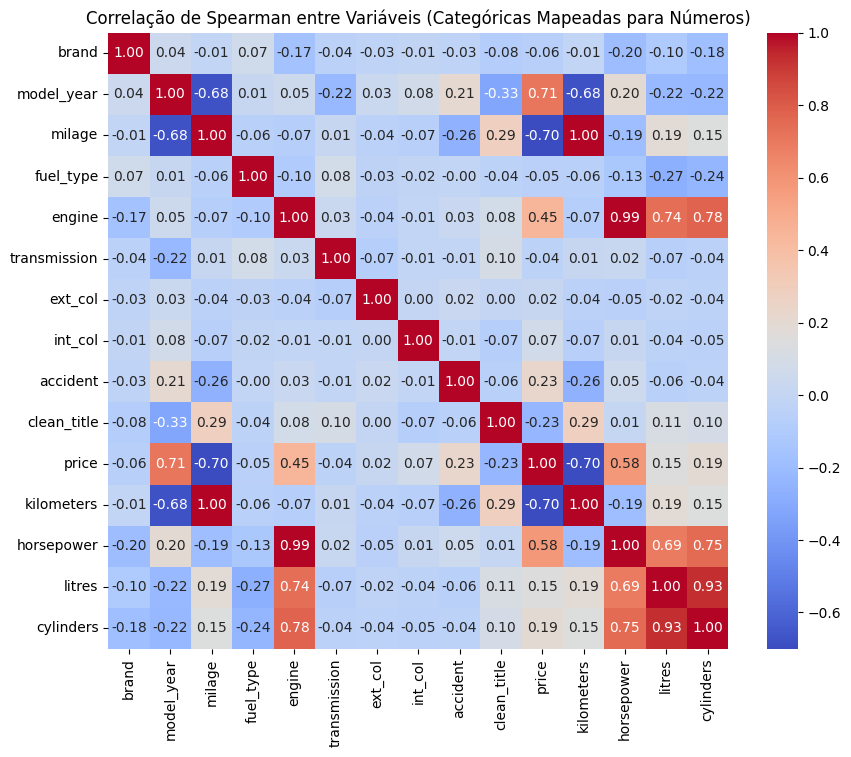

In [291]:
from sklearn.preprocessing import LabelEncoder

# Seleciona apenas as colunas não numéricas
categorical_columns = df.select_dtypes(include='object').columns

# Inicializa o LabelEncoder
label_encoder = LabelEncoder()

# Mapeia as categorias para números
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Calcule a matriz de correlação de Spearman
correlation_matrix = df.corr(method='spearman')

# Visualize a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação de Spearman entre Variáveis (Categóricas Mapeadas para Números)')
plt.show()


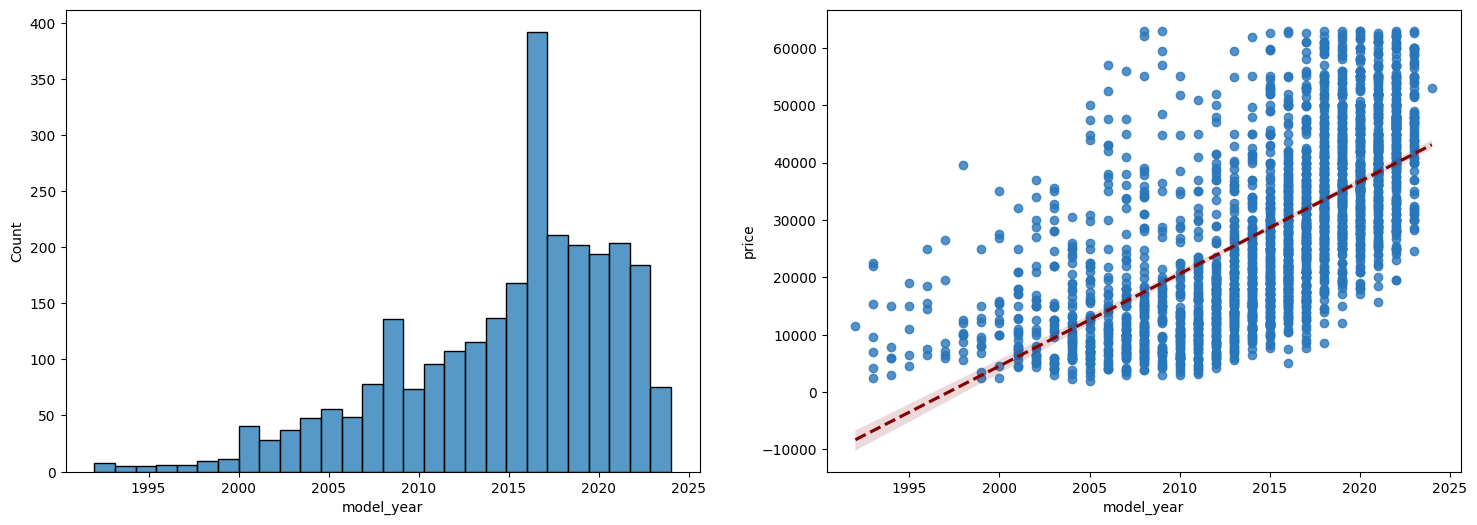

In [292]:
#If we contrast the year of the model with the price, we can see that a positive correlation exist between these two features. In general, the higher the year of the model, the higher the price will be.
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(data = df['model_year'], ax = axes[0])
sns.regplot(data = df, x = 'model_year', y = 'price', color = 'red',
            scatter_kws = {'color': sns.xkcd_rgb['bluish']},
            line_kws = {'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax = axes[1])


plt.show()



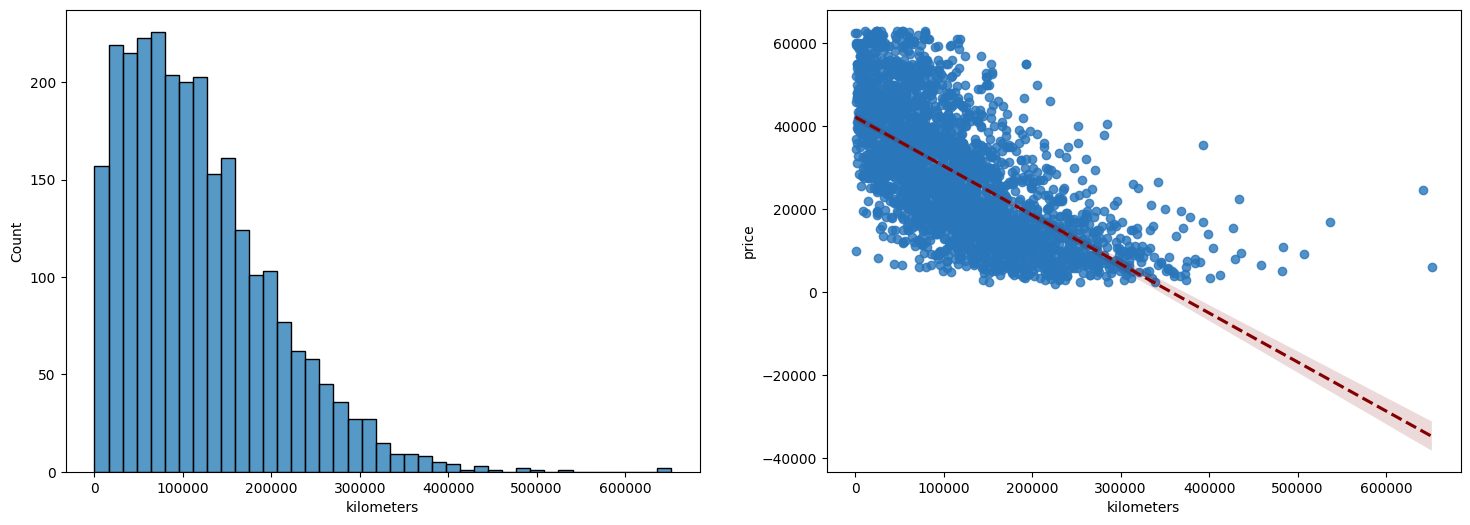

In [293]:
#As we can expect, we can see that a higher milage means a lower price. Naturally, a car that has a lot of milage probably does not have good efficiency or it is in the best condition, so the price must be lower to be more attractive for sale.

fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(data = df['kilometers'], ax = axes[0])
sns.regplot(data = df, x = 'kilometers', y = 'price', color = 'red',
            scatter_kws = {'color': sns.xkcd_rgb['bluish']},
            line_kws = {'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax = axes[1])

plt.show()



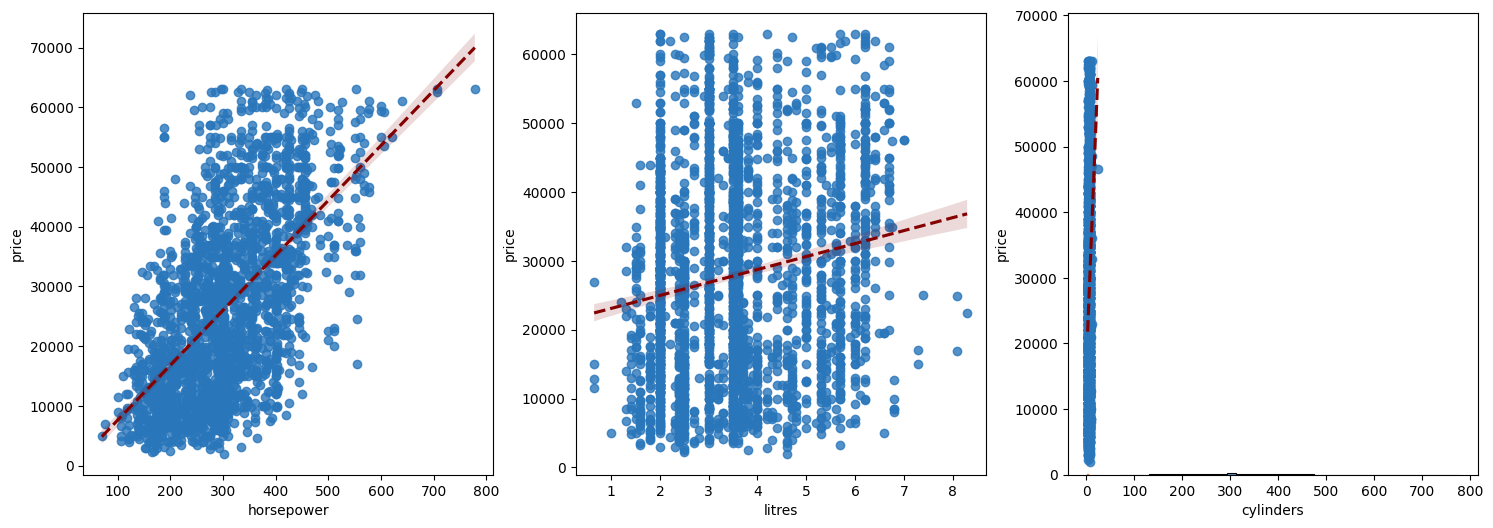

In [294]:
#From all the engine features, we see that horsepower holds the best correlation with the price, which we can see is positive. The other features don't give us much insight in relation to price.

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'horsepower'
sns.histplot(data=df['horsepower'], ax=axes[2])
sns.regplot(data=df, x='horsepower', y='price', color='red',
            scatter_kws={'color': sns.xkcd_rgb['bluish']},
            line_kws={'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax=axes[0])

# Plot for 'litres'
sns.histplot(data=df['litres'], ax=axes[2])
sns.regplot(data=df, x='litres', y='price', color='red',
            scatter_kws={'color': sns.xkcd_rgb['bluish']},
            line_kws={'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax=axes[1])

# Plot for 'cylinders'
sns.histplot(data=df['cylinders'], ax=axes[2])
sns.regplot(data=df, x='cylinders', y='price', color='red',
            scatter_kws={'color': sns.xkcd_rgb['bluish']},
            line_kws={'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax=axes[2])

plt.show()

In [295]:
# MODELING

In [296]:
import warnings
warnings.filterwarnings("ignore")

In [297]:
import pandas as pd
from sklearn.metrics import (
        make_scorer,
        confusion_matrix
)
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor # decision trees for classification
from sklearn.naive_bayes import GaussianNB # naive bayes for classification
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC # support vector machines for classification

In [298]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn+fp)

In [299]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
METRICS = {
    "MAE": make_scorer(mean_absolute_error),
    "MSE": make_scorer(mean_squared_error),
    "RMSE": make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    "R2": make_scorer(r2_score)
}

In [300]:
df = df.dropna()

In [301]:
df['price'].mean()

26104.413156649312

In [302]:
X, y = df.drop("price", axis=1), df["price"]

In [303]:
### Árvores de Decisão
dt = DecisionTreeRegressor(max_depth=3, random_state=1234)
dt.fit(X, y)  # Treinando o modelo
splitter = StratifiedKFold(10, random_state=1234, shuffle=True)
scores = cross_validate(dt, X, y, cv=splitter, scoring=METRICS)
dt_scores = pd.DataFrame(scores)
pd.DataFrame(dt_scores.mean()).T

,fit_time,score_time,test_MAE,test_MSE,test_RMSE,test_R2
0,0.020882,0.009652,7122.418674,8.582372e+07,9252.198962,0.623961


In [304]:
### NAIVE BAYNES
nb = GaussianNB()
scores_nb = cross_validate(nb, X, y, cv=splitter, scoring=METRICS)
nb.fit(X, y)  # Treinando o modelo
nb_scores = pd.DataFrame(scores_nb)
pd.DataFrame(nb_scores.mean()).T

,fit_time,score_time,test_MAE,test_MSE,test_RMSE,test_R2
0,0.078442,0.050447,7731.486088,1.090881e+08,10426.01039,0.5204


In [305]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=1234)

# Perform cross-validation with the Random Forest Regressor
scores_rf = cross_validate(rf, X, y, cv=splitter, scoring=METRICS)

# Display the results
rf_scores = pd.DataFrame(scores_rf)
rf.fit(X, y)  # Treinando o modelo
pd.DataFrame(rf_scores.mean()).T


,fit_time,score_time,test_MAE,test_MSE,test_RMSE,test_R2
0,4.081877,0.020293,4905.532309,4.550671e+07,6732.600038,0.80063


In [306]:
# VETOR MACHINE
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create an SVR model with a pipeline for scaling
svr = make_pipeline(StandardScaler(), SVR())

# Perform cross-validation with the SVR
scores_svr = cross_validate(svr, X, y, cv=splitter, scoring=METRICS)

# Display the results
svr.fit(X, y)  # Treinando o modelo
svr_scores = pd.DataFrame(scores_svr)
pd.DataFrame(svr_scores.mean()).T


,fit_time,score_time,test_MAE,test_MSE,test_RMSE,test_R2
0,0.385758,0.125335,12483.869214,2.345237e+08,15298.134109,-0.026084


In [307]:
#REDES NEURONAIS
from sklearn.neural_network import MLPRegressor

# Create an MLP Regressor
mlp = MLPRegressor(random_state=1234)

# Perform cross-validation with the MLP Regressor
scores_mlp = cross_validate(mlp, X, y, cv=splitter, scoring=METRICS)

# Display the results
mlp_scores = pd.DataFrame(scores_mlp)
mlp.fit(X, y)  # Treinando o modelo
pd.DataFrame(mlp_scores.mean()).T


,fit_time,score_time,test_MAE,test_MSE,test_RMSE,test_R2
0,2.3145,0.006564,6943.557049,8.262182e+07,9073.71984,0.637028


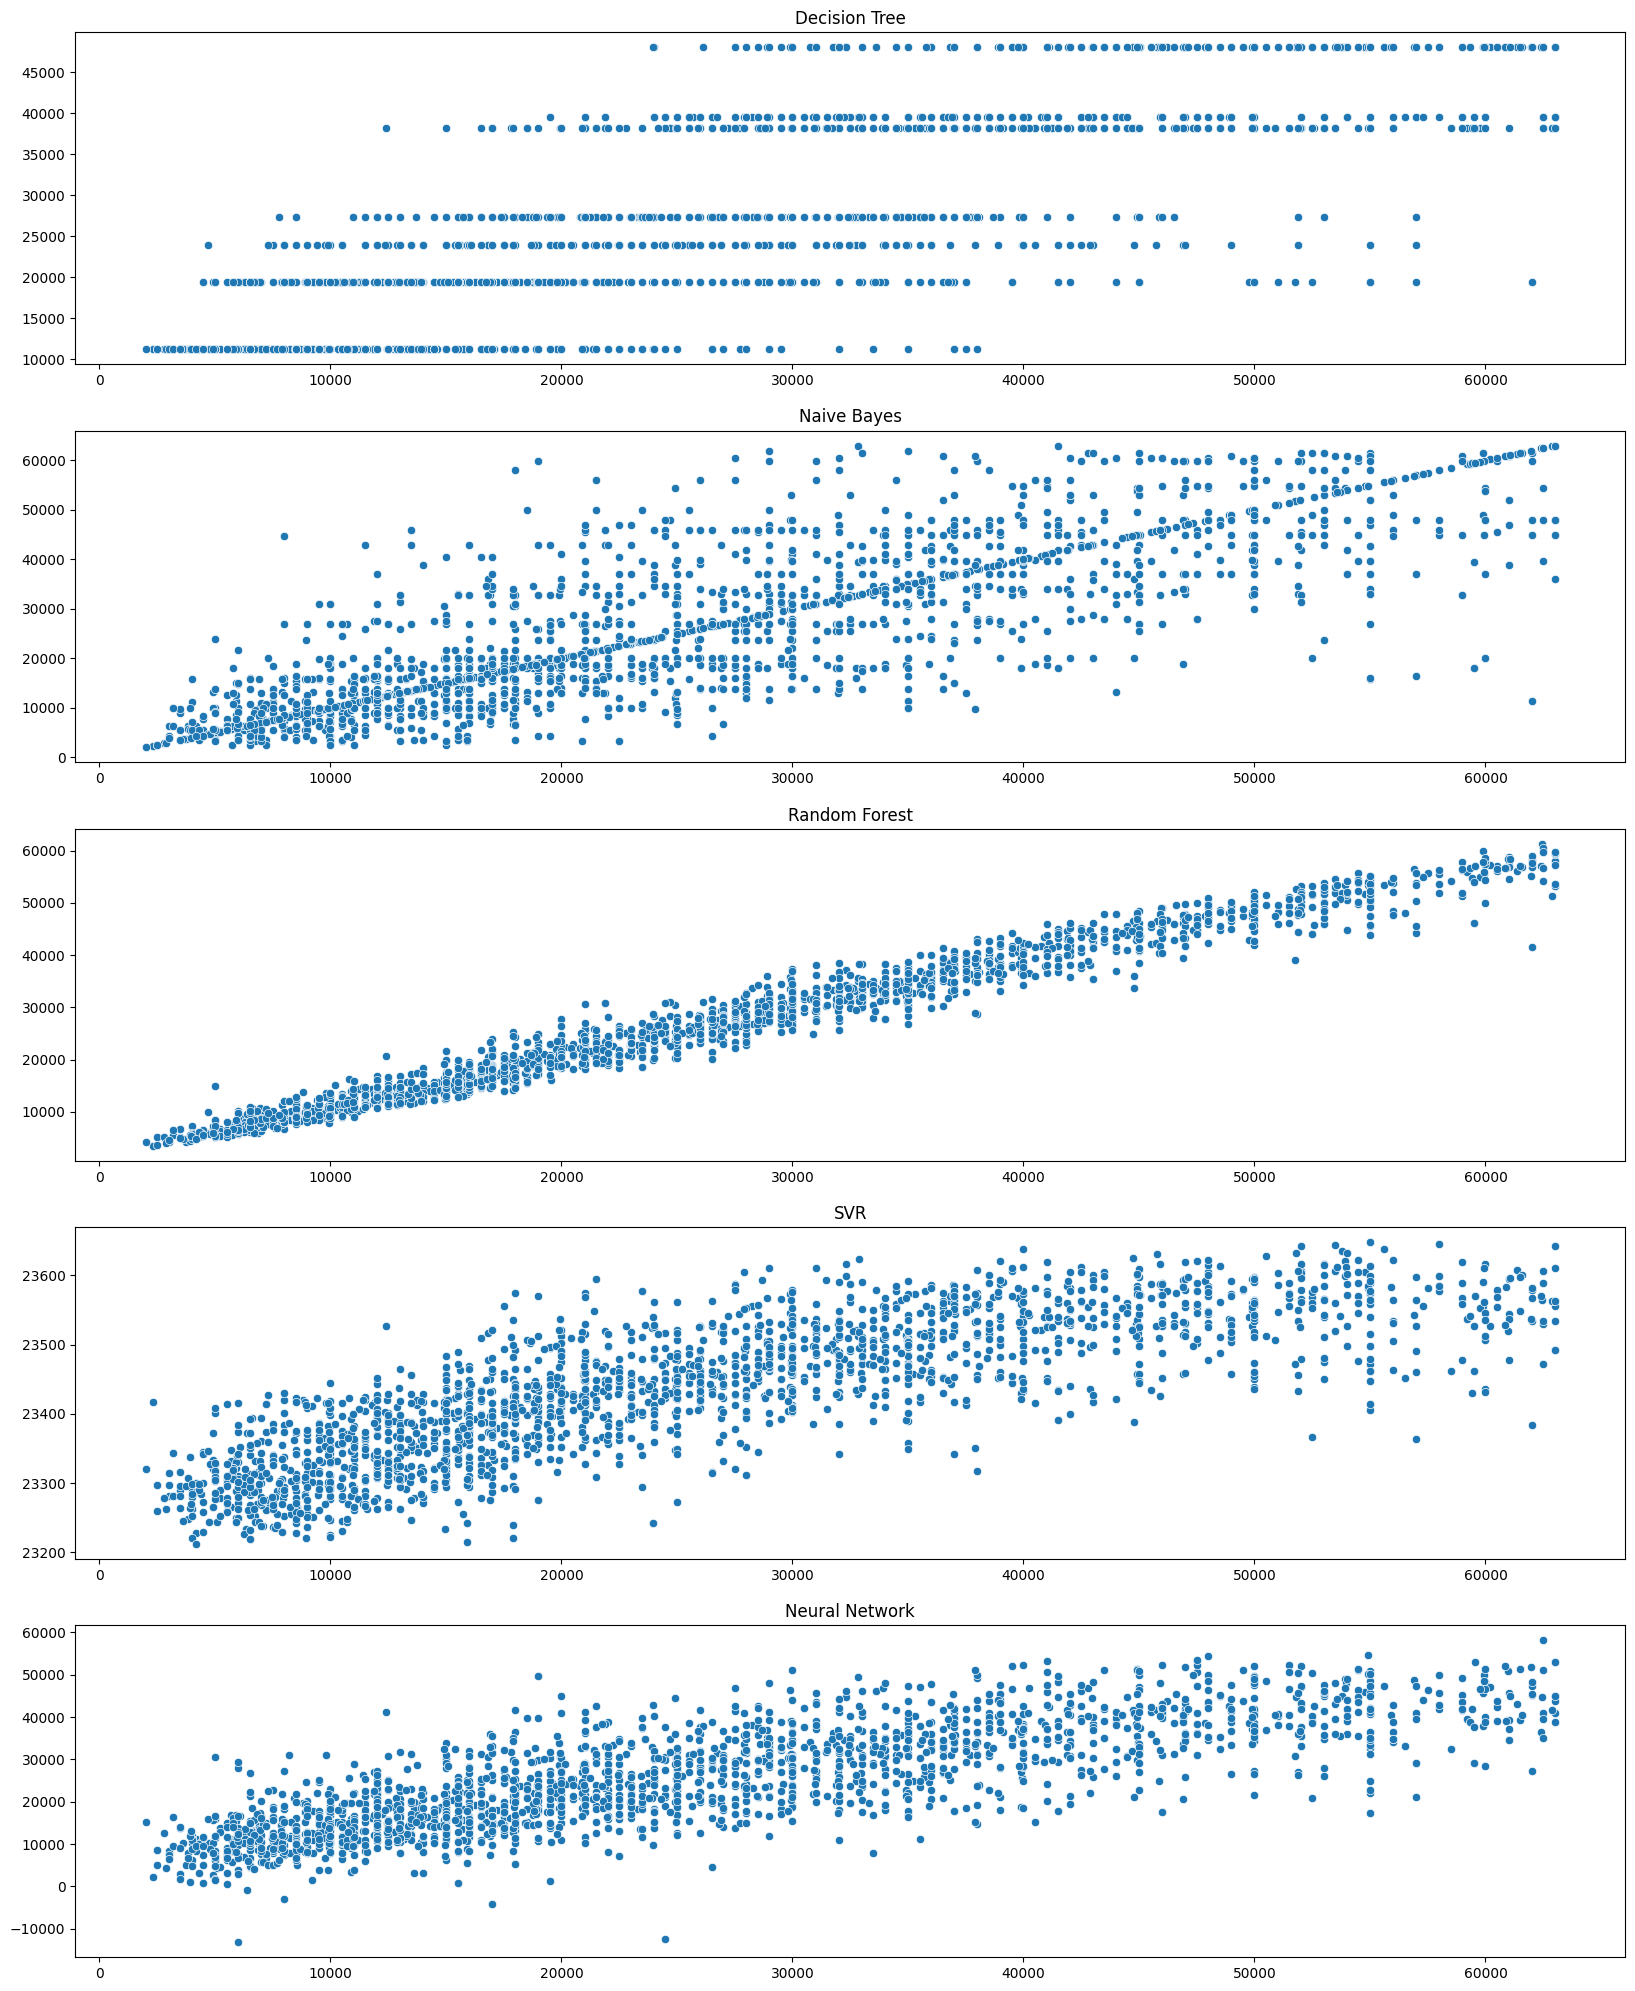

In [308]:
# Modelos e nomes para os gráficos
models = [dt, nb, rf, svr, mlp]
names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'SVR', 'Neural Network']

# Criando os gráficos de dispersão
fig, axes = plt.subplots(5, 1, figsize=(20, 25))
plt.subplots_adjust(hspace=0.2)

for e, ax in enumerate(axes):
    model = models[e]

    y_pred = model.predict(X)  # Agora, o modelo está treinado

    sns.scatterplot(x=y.values.ravel(), y=y_pred.ravel(), ax=ax)
    ax.set_title(names[e])

plt.show()